# S3W10D3: Optimizers - SGD vs Adam

## 1. 理论笔记 (Theory Notes)

请在 Notebook 开头记录以下通俗解释，这是面试时的“白话版”答案：

### 1.1 SGD (Stochastic Gradient Descent)

* **直觉**: 就像一个盲人在下山。他每走一步，就用脚探一探周围哪个方向最陡，然后走一步。
* **问题**:
    * **震荡 (Zig-Zag)**: 如果遇到了一个狭长的山谷（峡谷），SGD 会在两边的山壁上反复横跳，迟迟走不到谷底。
    * **卡在鞍点 (Saddle Point)**: 如果遇到一块平地（梯度接近 0），SGD 就停在原地不动了，以为到了终点。



### 1.2 Momentum (动量)

* **直觉**: 给这个盲人穿上一双**很重的铁鞋**（或者把他想象成一个大铁球）。
* **原理**: 
    * 现在的速度 = 之前的速度（惯性） + 当前的坡度（梯度）。


* **解决**:
    * 因为有惯性，即使遇到平地（梯度为0），靠着之前的速度也能冲过去（跳出鞍点）。
    * 在峡谷中，左右震荡的分量会互相抵消，而向下的分量会叠加，所以下山更快。



### 1.3 Adam (Adaptive Moment Estimation)

* **直觉**: **Momentum + RMSprop**。这是目前的“默认首选”。
* **核心**:
    1. **一阶动量 (Mean)**: 像 Momentum 一样，记录梯度的方向（解决震荡和鞍点）。
    2. **二阶动量 (Variance)**: 记录梯度的“大小/波动程度”。如果某个参数的梯度一直很大（很陡），Adam 会自动把这个参数的学习率调小一点（防止步子太大扯着蛋）；如果某个参数梯度很稀疏，学习率就调大一点。


* **结论**: Adam = **带惯性**且**懂得自动换挡**的跑车。

## 2. 代码实战: 龟兔赛跑 (Coding)

在 Notebook 中运行以下代码。我们将用同一个“难训练”的任务，分别用 SGD 和 Adam 跑，看 Loss 曲线。

Training with SGD...
Training with Adam...


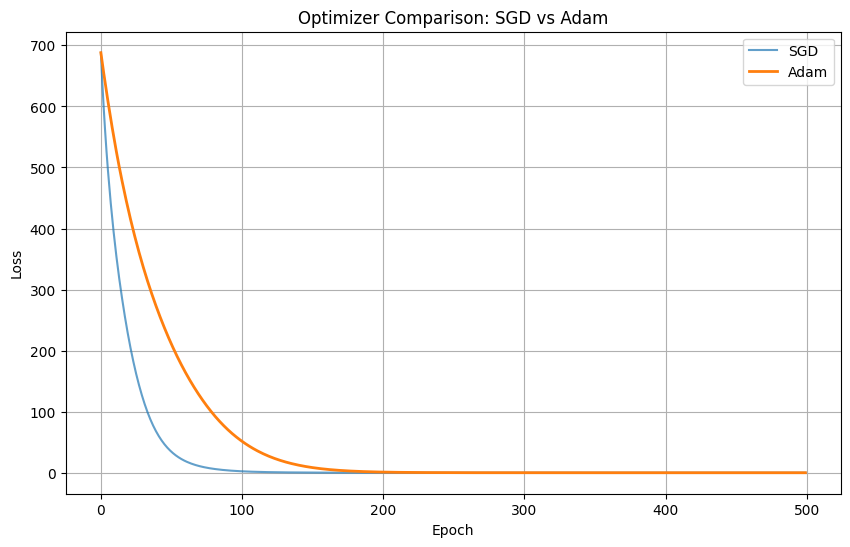

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 1. 准备数据
# 我们生成一个稍微难一点的回归任务
torch.manual_seed(42)
N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# 2. 定义模型工厂函数
# 必须保证两个优化器训练的模型，初始权重是完全一样的！
def get_model():
    torch.manual_seed(42) # 关键：重置种子，保证初始化权重一致
    model = nn.Sequential(
        nn.Linear(D_in, H),
        nn.ReLU(),
        nn.Linear(H, D_out)
    )
    return model

# 3. 训练辅助函数
def train_model(optimizer_name, learning_rate):
    model = get_model()
    
    if optimizer_name == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    elif optimizer_name == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    losses = []
    
    for epoch in range(500):
        # Forward
        y_pred = model(x)
        loss = (y_pred - y).pow(2).sum()
        losses.append(loss.item())
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    return losses

# 4. 开始比赛
print("Training with SGD...")
sgd_losses = train_model('SGD', 1e-4) # SGD 通常需要精细调节 LR

print("Training with Adam...")
adam_losses = train_model('Adam', 1e-4) # 同样的 LR，Adam 通常更快

# 5. 绘图对比
plt.figure(figsize=(10, 6))
plt.plot(sgd_losses, label='SGD', alpha=0.7)
plt.plot(adam_losses, label='Adam', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Optimizer Comparison: SGD vs Adam')
plt.legend()
plt.grid(True)
plt.show()

**预期结果**: 你会看到 Adam 的 Loss 曲线像坐滑梯一样迅速下降，而 SGD 可能还在缓慢爬行，或者震荡。

---

## 3. 今日算法补充 (LeetCode)

**题目**: [101. Symmetric Tree (对称二叉树)](https://leetcode.com/problems/symmetric-tree/)
**难度**: Easy
**关联**: 这道题是昨天“翻转二叉树”的逻辑延伸。

**题目描述**: 给你一个二叉树的根节点 `root`， 检查它是否是轴对称的。

**核心思路 (递归)**:
判断一棵树是否对称，其实是判断**左右子树**是否是“镜像”关系。
我们需要写一个辅助函数 `isMirror(node1, node2)`：

1. **终止条件**:
* 如果 node1 和 node2 都是 None -> True (空对空，对称)。
* 如果一个 None 一个不是 -> False (不对称)。
* 如果两个值不相等 -> False (不对称)。


2. **递归逻辑**:
* 判断 `node1.left` 和 `node2.right` 是否镜像（外侧对内侧）。
* 判断 `node1.right` 和 `node2.left` 是否镜像（内侧对外侧）。



**代码模板 (请尝试自己补充中间逻辑)**:

```python
# class TreeNode: ... (同昨天)

class Solution:
    def isSymmetric(self, root: Optional[TreeNode]) -> bool:
        if not root:
            return True
        # 启动辅助函数，比较左右子树
        return self.check(root.left, root.right)
    
    def check(self, p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:
        # 1. 如果都为空
        if not p and not q:
            return True
        # 2. 如果一个空一个不空
        if not p or not q:
            return False
        # 3. 如果值不相等
        if p.val != q.val:
            return False
            
        # 4. 递归检查：(p的左 vs q的右) AND (p的右 vs q的左)
        return self.check(p.left, q.right) and self.check(p.right, q.left)

```

---

### 🚀 行动指南

1. **Code**: 创建 `S3W10D3_Optimizers_Comparison.ipynb` 并运行对比代码。
2. **Theory**: 看着生成的 Loss 曲线，口述一遍为什么 Adam 降得快（关键词：自适应步长）。
3. **Algo**: 完成 LeetCode 101。

开始吧，黄同学！如果有报错，随时把错误信息发给我。